## Homework - Machine Learning Preparation
# DO NOT EDIT DIRECTLY, DOWNLOAD AND EDIT THE DOWNLOADED FILE



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.4
pandas version :  1.2.5
seaborn version :  0.12.1


In [ ]:
# sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
data = pd.read_csv('Product_Exclusive_Classification.csv')
data.shape

(8000, 9)

Dapat dilihat pada dataset bahwa terdapat 8000 data dan 9 fitur 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


A. Semua tipe data sudah sesuai

In [ ]:
data.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

B. Terdapat beberapa kolom kosong yang dapat dilihat dari jumlah Non-Null Count yang kurang ddari 8000 yaitu:
- category : 13 data kosong
- rating : 95 data kosong
- number of reviews : 9 data kosong
- love : 34 data kosong
- price : 8 data kosong
- value_price : 17 data kosong
Rating memiliki data kosong yang paling banyak.

**Follow Up Pre-processing**

Suatu perlakukan perlu diterapkan untuk data kosong, bisa di drop atau di isi menggunakan interpolasi

In [ ]:
cats = ['brand', 'category']
nums = ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']

## Describe Data

In [ ]:
data[nums].describe()

,rating,number_of_reviews,love,price,value_price,exclusive
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [ ]:
data[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


C. Berikut keanehan yang kami temukan dari deskriptive data: 

- Nilai max dan min pada rating dan number_of_reviews memiliki jarak yang sangat jauh dari rata-rata, hal ini kemungkinan merupakan nilai outlier
- Descriptive price dan value_price sangat mirip, kedua fitur tersebut kemungkinan memiliki relasi yang sangat kuat
- Nilai max pada price dan value_price sangat jauh dari rata-rata, kemungkinan terpadat suatu product outlier yang harganya sangat mahal dibandingkan produk lainnya.

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

## Pendekatan Grafis

### Univariate Analysis (20 Poin)

#### Boxplots

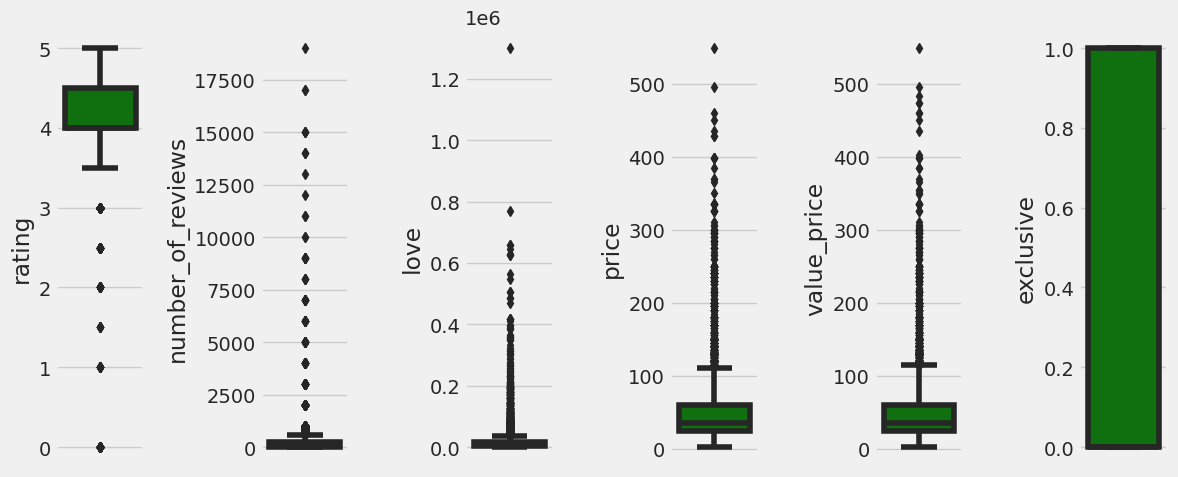

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='green', orient='v')
    plt.tight_layout()

#### KDE Plots

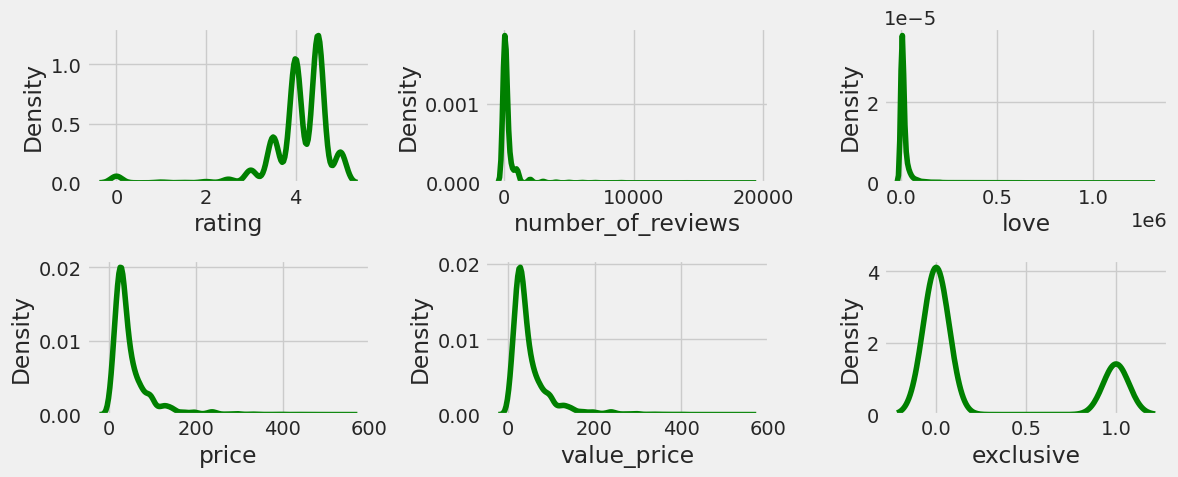

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=data[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

#### Violin Plot

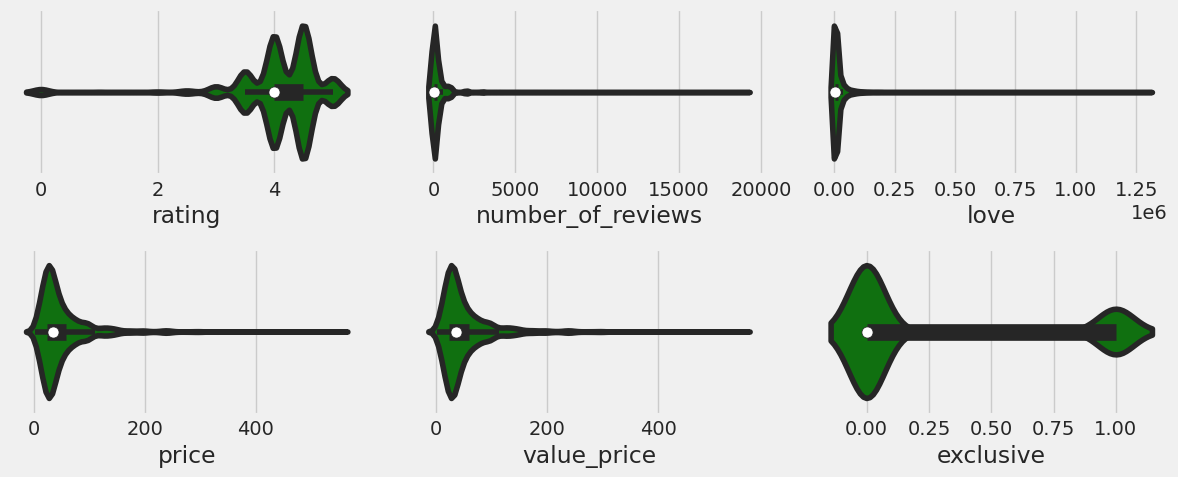

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=data[nums[i]], color='green', orient='v')
    plt.tight_layout()

#### Count Plot

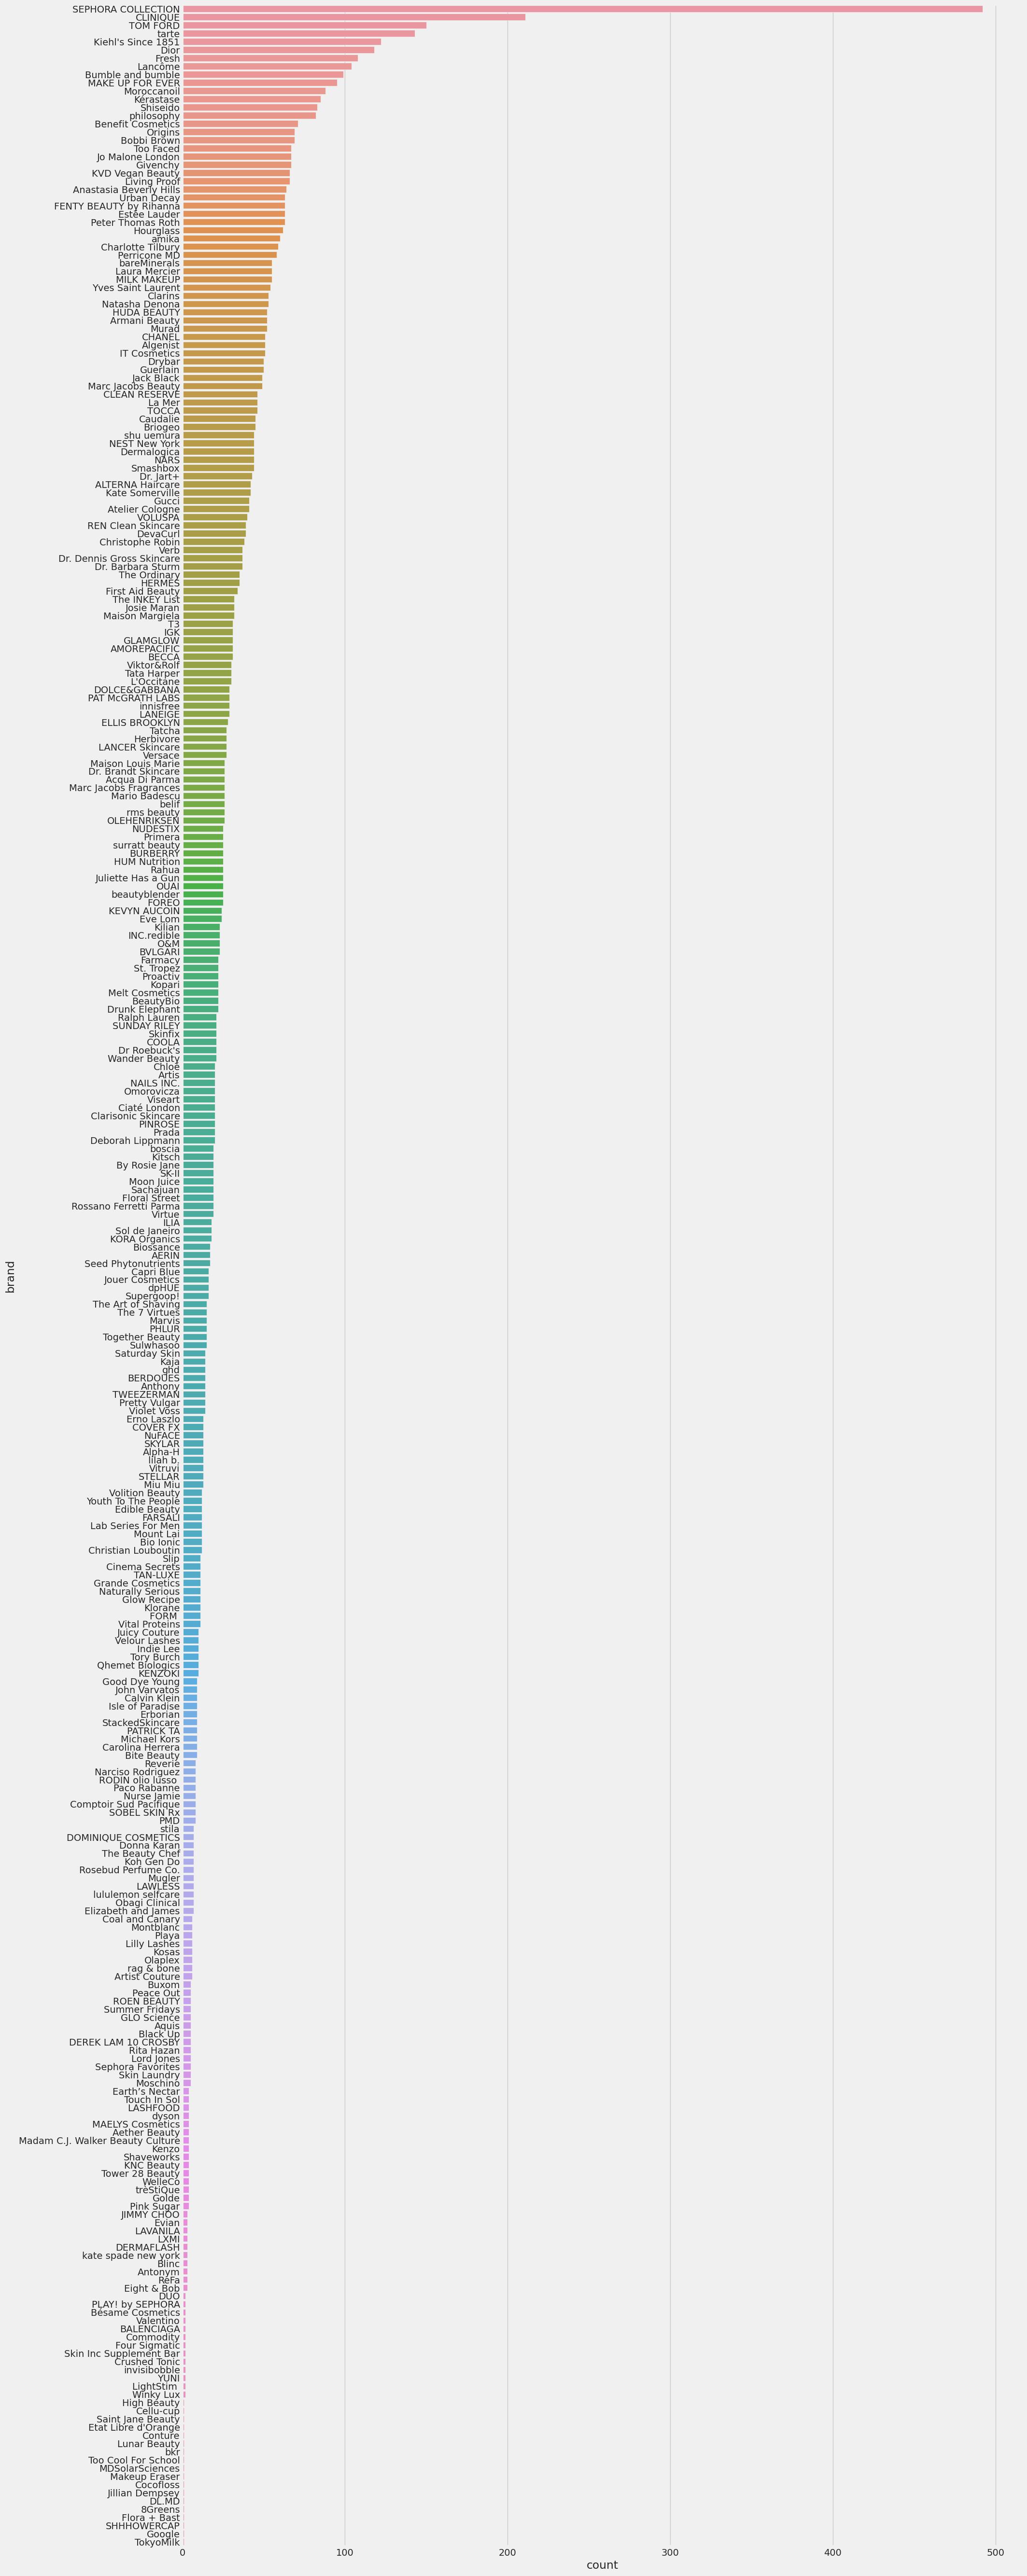

In [ ]:
plt.figure(figsize=(20, 65))
sns.countplot(data=data, y=cats[0], order=data[cats[0]].value_counts().index)
plt.show()

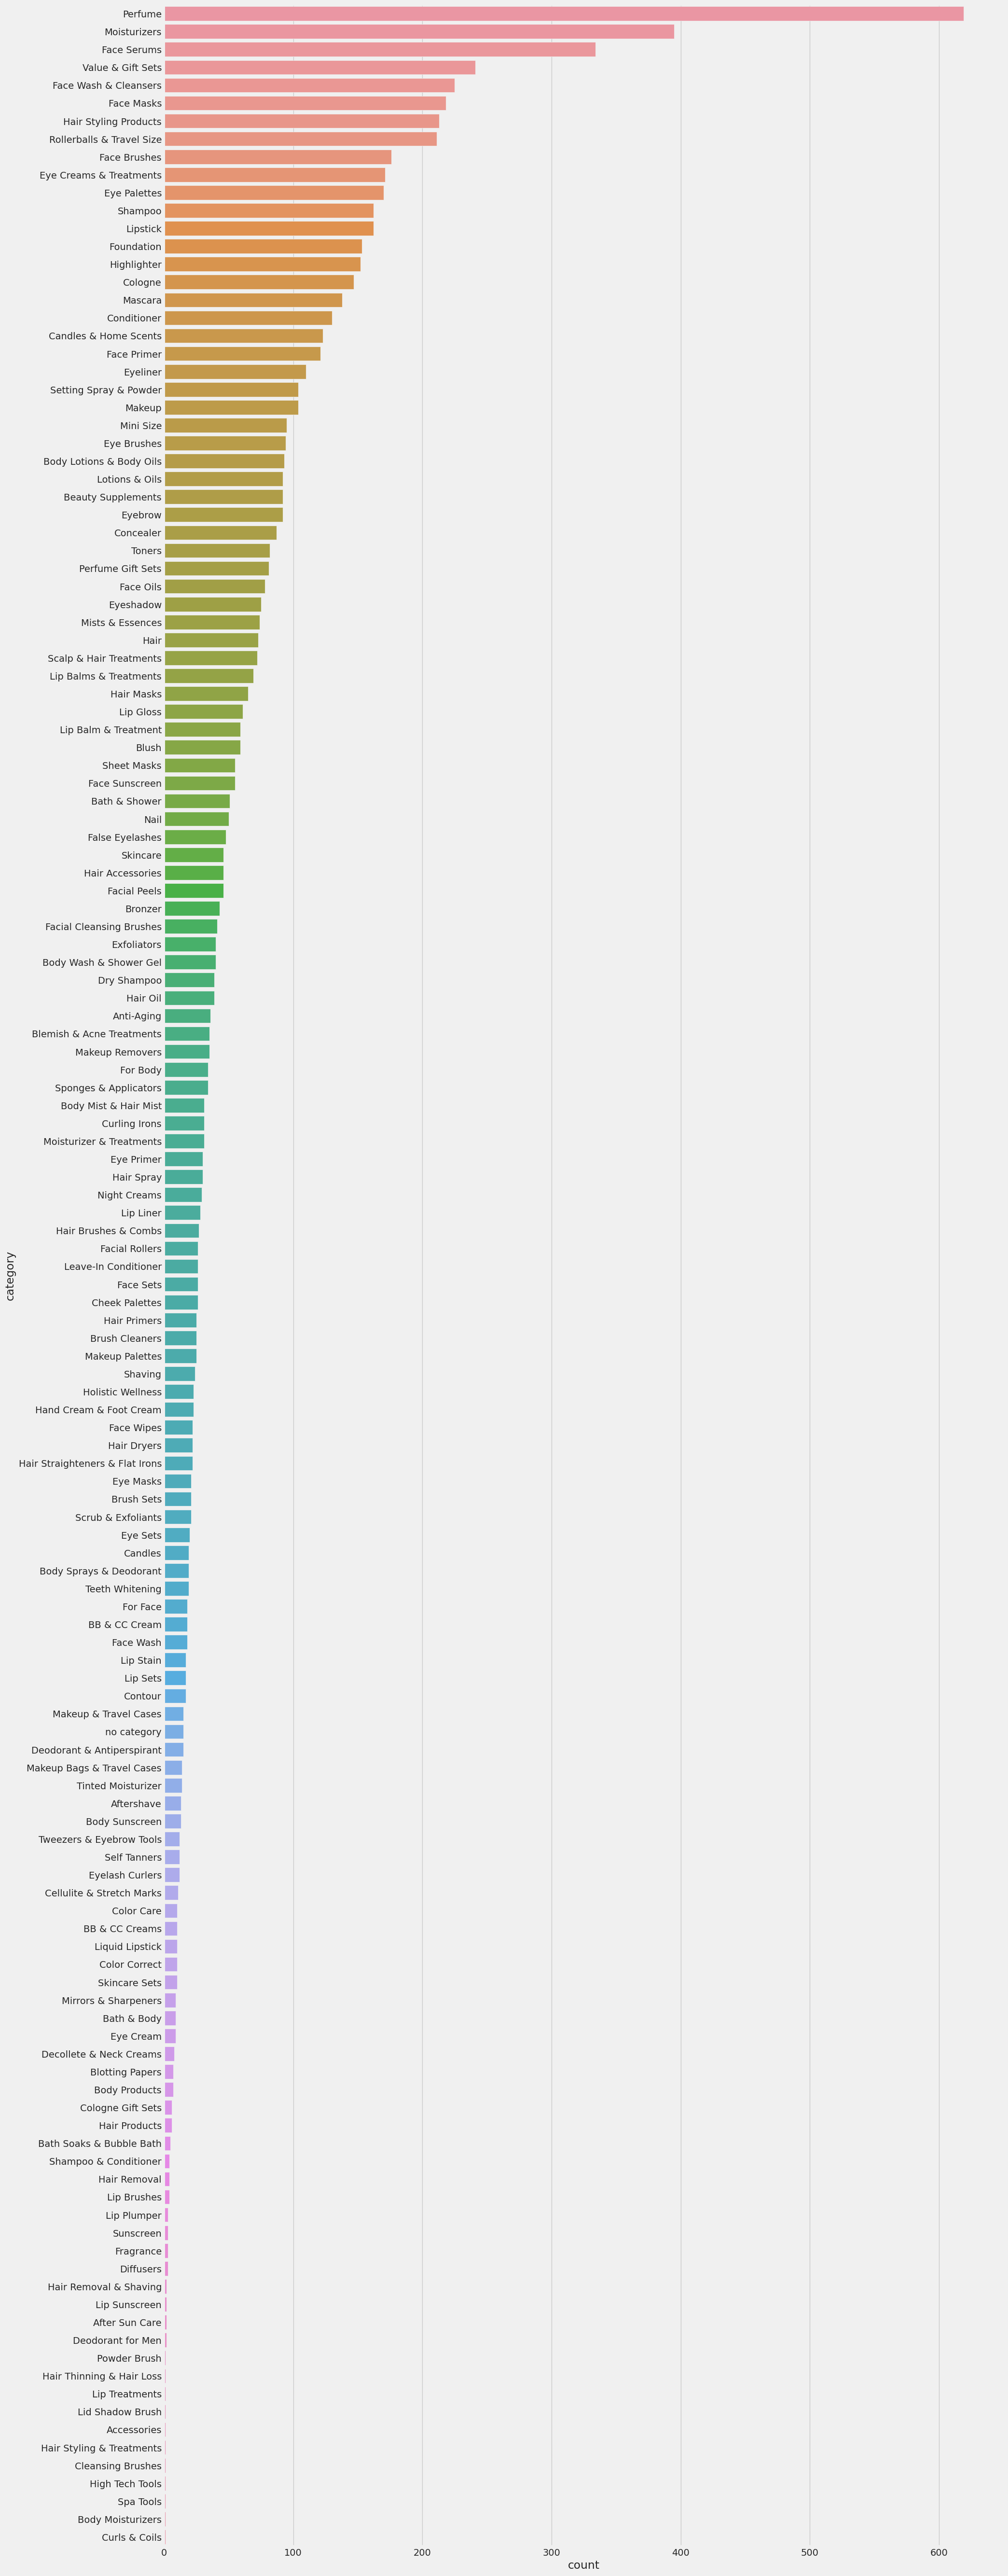

In [ ]:
plt.figure(figsize=(20, 65))
sns.countplot(data=data, y=cats[1], order=data[cats[1]].value_counts().index)
plt.show()

#### Insight

##### 1. Brand

Brand adalah merk dari produk

- Terdapat 310 merek unik.
- Mayoritas produk berasal dari merek "SEPHORA COLLECTION".
- Terdapat beberapa merek lainnya tetapi jumlah produk mereka jauh lebih sedikit dibandingkan dengan "SEPHORA COLLECTION".

**Follow Up**

Mengingat sebagian besar produk berasal dari "SEPHORA COLLECTION" mungkin perlu dipertimbangkan untuk mengelompokkan merek jumlah produk yang sangat sedikit ke dalam satu kategori "Lainnya".

##### 2. Category

Category merupakan Kategori produk

- Terdapat 142 kategori unik
- Mayoritas produk berasal dari merek "Perfumme".
- Terdapat beberapa kategori lainnya tetapi jumlah produk mereka jauh lebih sedikit dibandingkan dengan "Perfumme".

**Follow Up**

Mengingat sebagian besar produk berasal dari "Perfume" mungkin perlu dipertimbangkan untuk mengelompokkan kategory jumlah produk yang sangat sedikit ke dalam satu kategori "Lainnya".

##### 3. Rating

Rating adalah penilaian yang diberikan untuk suatu produk

- Banyak produk dengan rating 0 yang tampaknya seperti outlier. Ini mungkin mengindikasikan produk yang belum mendapatkan rating atau ada alasan lain.

**Follow Up**

Perlu ditangani produk dengan rating 0. Apakah ini berarti produk tersebut belum mendapatkan rating atau ada alasan lain?

##### 4. Number of Review

Number of Review adalah Jumlah ulasan yang diberikan untuk produk

- Mayoritas produk memiliki jumlah ulasan yang sangat sedikit.
- Data ini sangat skewed ke kanan.
- Ada banyak outlier di sebelah kanan, yang menunjukkan beberapa produk dengan jumlah ulasan yang sangat tinggi dibandingkan dengan produk lainnya.

**Follow Up**

Mengingat distribusi yang sangat skewed, transformasi mungkin diperlukan untuk mengatasi skewness (misalnya, transformasi log).

##### 5. Love

Love adalah indikator seberapa banyak suatu produk disukai.

- sebagian besar produk memiliki nilai "love" yang sangat rendah.
- Data ini sangat skewed ke kanan.
- ada banyak outlier di sebelah kanan. Ini menunjukkan beberapa produk sangat disukai dibandingkan dengan produk lainnya

**Follow Up**

Mengingat distribusi yang sangat skewed, transformasi mungkin diperlukan untuk mengatasi skewness (misalnya, transformasi log).

##### 6. Price dan Value Price

Price merupakan Harga suatu produk

- Sebagian besar produk memiliki price dan value price di bawah 100.
- Terdapat beberapa produk dengan price dan value price yang sangat tinggi dibandingkan dengan produk lainnya, yang ditunjukkan sebagai outlier di sebelah kanan dari boxplot.

**Follow Up**

Outlier perlu ditangani, dan mungkin diperlukan normalisasi atau standarisasi.

##### 7. Exclusive

Eksklusif mmerupakan kolom target yang menunjukkan apakah produk eksklusif atau tidak.

- Mayoritas produk tampaknya bukan eksklusif (dengan label 0).
- Hanya sebagian kecil produk yang eksklusif (dengan label 1).

**Follow Up**

Mengingat ketidakseimbangan label, kita mungkin perlu mempertimbangkan teknik seperti oversampling, undersampling, atau menggunakan metrik evaluasi yang sesuai (misalnya, F1-Score atau AUC-ROC) saat membangun model prediksi.

### Multivariate Analysis (10 Poin)

#### Correlation Map

<AxesSubplot: >

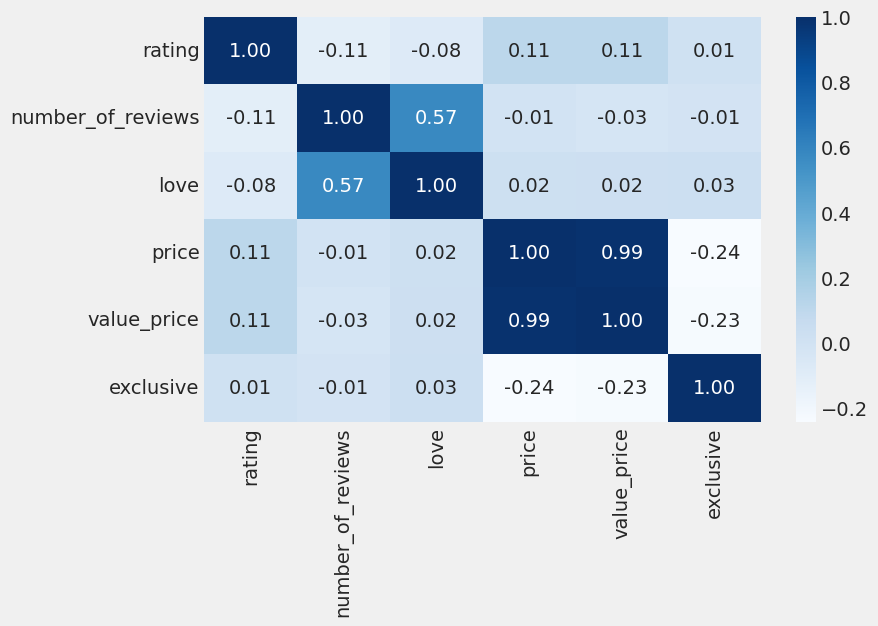

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 500x500 with 0 Axes>

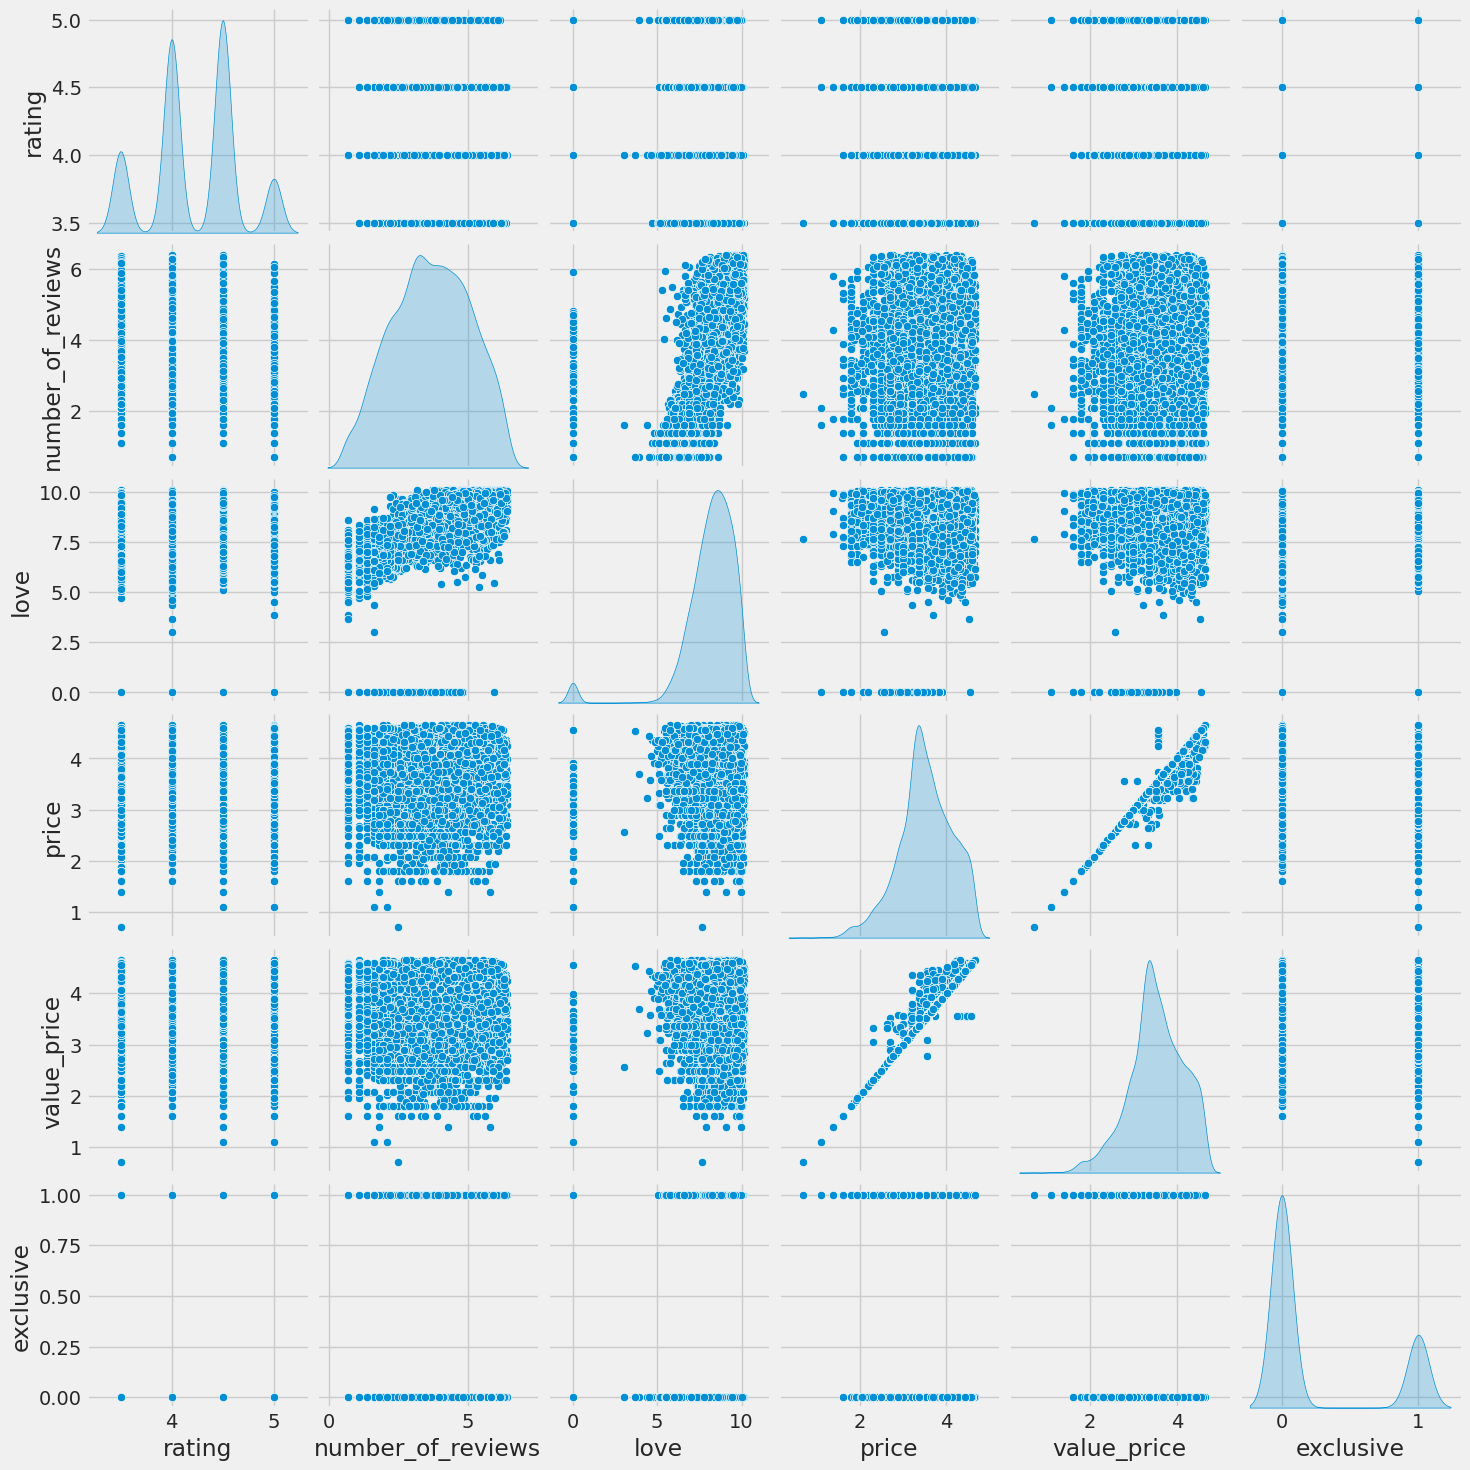

In [ ]:
plt.figure(figsize=(5, 5))
sns.pairplot(data[nums], diag_kind='kde')

Dari hasil correlation map dapat dilihat bahwa:
- number_of_reviews dan love memiliki korelasi yang signifikan hingga 74%
- price dan value_price memiliki korelasi yang hampir sama yaitu 99%
- tidak ada fitur yang memiliki korelasi yang tinggi dengan target

**Follow Up**
- pasangan-pasangan fitur yang memiliki korelasi tinggi ini kemungkinan redundan dan bisa dijadikan satu fitur saja
- model linear tidak bisa digunakan karena tidak ada fitur yang memiliki korelasi yang tinggi dengan target (exclusive)

# Data Preparation

## Missing Value (5 Poin)

In [ ]:
missing_values = data.isnull().sum()

missing_values

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
# For categorical column
data['category'].fillna('Unknown', inplace=True)

# For numerical columns
numerical_cols_with_na = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']
for col in numerical_cols_with_na:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Check again for missing values to confirm
missing_values_after = data.isnull().sum()

missing_values_after

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

## Duplicate Values (5 Poin)


In [ ]:
# Check for duplicated rows in the dataset
duplicated_rows = data[data.duplicated()]

# Display the number of duplicated rows
num_duplicated_rows = duplicated_rows.shape[0]
num_duplicated_rows

0

Tidak ada baris yang duplikat dalam dataset.

## Outliers (5 Poin)

In [ ]:
from scipy import stats

In [ ]:
# Detect outliers using Z Score
df_clean = data.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for col in ['number_of_reviews', 'value_price','rating','love','price']:
    zscore = abs(stats.zscore(df_clean[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df2 = df_clean[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 5323
Jumlah baris setelah memfilter outlier: 5188


In [ ]:
# Remove rows containing outliers
initial_data_size = data.shape[0]

for column in nums:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to exclude outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

remaining_data_size = data.shape[0]
rows_removed = initial_data_size - remaining_data_size

rows_removed

2677

## Feature Transformation (5 Poin)


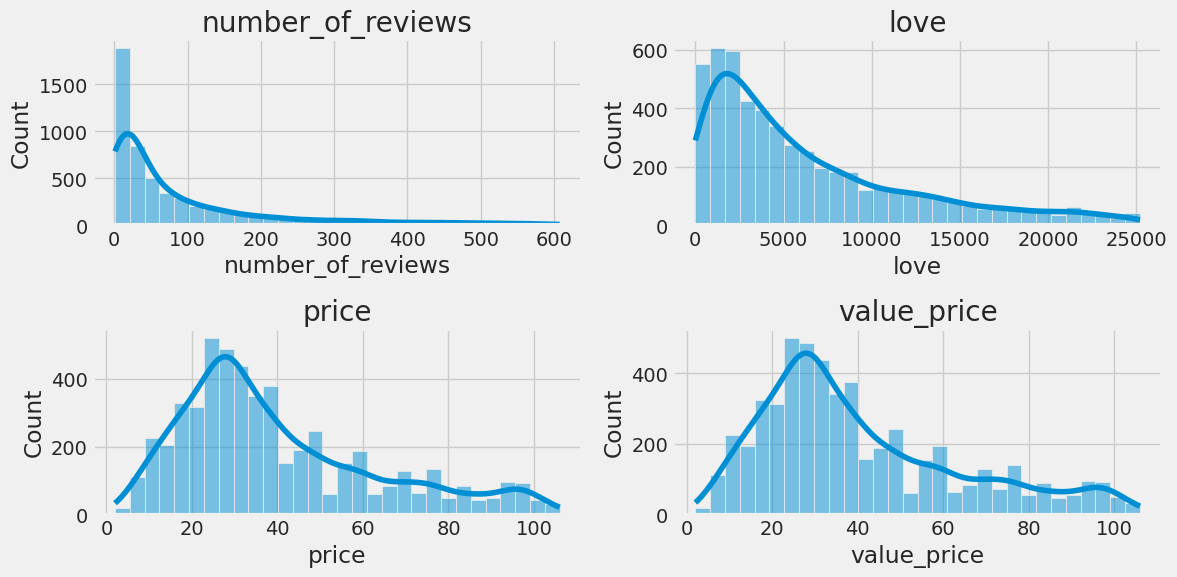

In [ ]:
# Plot histograms again to see the new distributions
plt.figure(figsize=(12, 6))

for i, col in enumerate(['number_of_reviews', 'love', 'price', 'value_price'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Apply log transformation
data['number_of_reviews'] = np.log1p(data['number_of_reviews'])
data['love'] = np.log1p(data['love'])
data['price'] = np.log(data['price'])
data['value_price'] = np.log(data['value_price'])

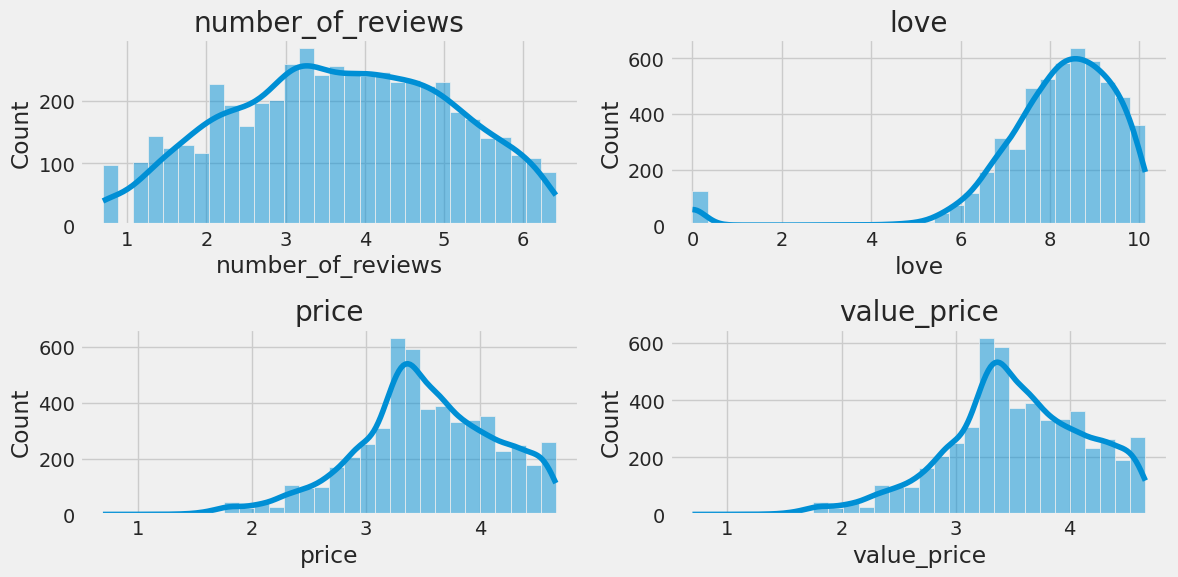

In [ ]:
# Plot histograms again to see the new distributions
plt.figure(figsize=(12, 6))

for i, col in enumerate(['number_of_reviews', 'love', 'price', 'value_price'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

## Feature encoding (5 Poin)

Tidak perlu feature encoding karena semua feature sudah numerical (Brand dan Category tidak digunakan)

## Class imbalance (5 Poin)

In [ ]:
# Manual oversampling of the minority class

# Separate the majority and minority classes
majority_class = data[data['exclusive'] == 0]
minority_class = data[data['exclusive'] == 1]

# Upsample the minority class to match the number of samples in the majority class
minority_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine majority class with upsampled minority class
data_resampled = pd.concat([majority_class, minority_upsampled], axis=0)

# Check the distribution of the target class after manual oversampling
resampled_distribution_manual = data_resampled['exclusive'].value_counts()

resampled_distribution_manual

0    3964
1    3964
Name: exclusive, dtype: int64

Class imbalance diatasi dengan oversampling data yang lebih sedikit.

## Feature Engineering

### Feature Selection

<img src="image-20231014-203753.png" width="" align="" />

- Value price dan price memiliki korelasi yang sangat tinggi, fitur yang akan dibuang adalah value_price dan yang akan dipertahankan adalah price karena price memiliki korelasi yang lebih tinggi dengan exclusive

- Love dan number_of_reviews memiliki korelasi yang cukup tinggi, fitur yang akan dibuang adallah numbber_of_reviews dan yang akan dipertahankan adallah love karena love memiliki korelasi yang lebih tinggi dengan exclusive 

### Feature Extraction

In [ ]:
data

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,price_type
0,50,SEPHORA COLLECTION,no category,5.0,3.850148,0.000000,3.912023,3.912023,0,Cheap
5,6528,Givenchy,Perfume,4.5,4.553877,8.006701,4.356709,4.356709,0,Cheap
6,7393,BVLGARI,Cologne,5.0,3.465736,8.101981,4.543295,4.543295,0,Cheap
7,7740,Yves Saint Laurent,Perfume,4.5,5.105945,8.343078,4.127134,4.127134,0,Cheap
8,11023,Carolina Herrera,Perfume,4.5,4.852030,7.972811,4.454347,4.454347,0,Cheap
...,...,...,...,...,...,...,...,...,...,...
7993,2293181,VOLUSPA,Candles & Home Scents,4.0,2.708050,8.071219,2.890372,2.890372,0,Cheap
7994,2293199,VOLUSPA,Candles,5.0,0.693147,4.532599,4.442651,4.442651,0,Cheap
7996,2293439,TOM FORD,Lipstick,4.0,3.433987,9.425532,4.007333,4.007333,0,Cheap
7997,2293488,FENTY BEAUTY by Rihanna,Lip Sets,4.5,3.135494,9.465060,3.367296,3.526361,1,Cheap


membagi Price_Type menadi beberapa kategori sesuai berikut ini: 

- cheap : < 2

- medium : 2-3

- expensive : >3

In [ ]:
def price_type(x):
    if x < 2:
        return "Cheap"
    elif x <= 3:
        return "Medium"
    else:
        return "Expensive"

In [ ]:
data["price_type"] = data["price"].apply(lambda x : price_type(x))

In [ ]:
data

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,price_type
0,50,SEPHORA COLLECTION,no category,5.0,3.850148,0.000000,3.912023,3.912023,0,Expensive
5,6528,Givenchy,Perfume,4.5,4.553877,8.006701,4.356709,4.356709,0,Expensive
6,7393,BVLGARI,Cologne,5.0,3.465736,8.101981,4.543295,4.543295,0,Expensive
7,7740,Yves Saint Laurent,Perfume,4.5,5.105945,8.343078,4.127134,4.127134,0,Expensive
8,11023,Carolina Herrera,Perfume,4.5,4.852030,7.972811,4.454347,4.454347,0,Expensive
...,...,...,...,...,...,...,...,...,...,...
7993,2293181,VOLUSPA,Candles & Home Scents,4.0,2.708050,8.071219,2.890372,2.890372,0,Medium
7994,2293199,VOLUSPA,Candles,5.0,0.693147,4.532599,4.442651,4.442651,0,Expensive
7996,2293439,TOM FORD,Lipstick,4.0,3.433987,9.425532,4.007333,4.007333,0,Expensive
7997,2293488,FENTY BEAUTY by Rihanna,Lip Sets,4.5,3.135494,9.465060,3.367296,3.526361,1,Expensive


### Feature Tambahan

- mass_produced. Feature ini adalah indikator apakah suatu produk diproduksi secara massal atu tidak. Feature ini bertipe categorical dan mempunyai dua value 0 (False) untuk menandakan tidak diproduksi secara massal dan 1 (True) menandakan produk diproduksi secara massal.

- kota_asal. 
Feature ini adalah kota tempat produk diproduksi. Feature ini bisa menjelaskan apakah suatu produk eksklusif atau tidak. Contohnya, produk yang diproduksi di kota asal usulnya dapat menandakan bahwa produk tersebut lebih eksklusif.

- bahan_baku
Jenis bahan baku yang digunakan dalam pembuatan produk juga dapat mempengaruhi tingkat eksklusivitas. Penggunaan bahan baku premium atau langka dapat menandakan produk yang lebih eksklusif dibandingkan dengan produk yang menggunakan bahan baku umum atau murah.

- limited_edition
Fitur yang menunjukkan apakah produk merupakan edisi terbatas atau tidak. Produk dengan label "Limited Edition" cenderung dianggap lebih eksklusif karena ketersediaannya terbatas.

# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?

### 1. EDA

EDA membantu dalam memahami dataset yang Anda miliki, termasuk struktur, hubungan, dan pola yang mungkin ada di dalamnya. Anda dapat melihat statistik deskriptif, distribusi, korelasi, dan visualisasi data.

### 2. Remove Outliers

Outlier dapat mempengaruhi model machine learning dengan cara yang tidak diinginkan. Penghapusan outlier membantu memastikan bahwa model yang dibangun lebih stabil, akurat, dan tidak terpengaruh oleh data yang tidak sesuai atau tidak representatif.

### 3. Feature Transformation

Transformasi fitur seperti normalisasi atau standarisasi membantu dalam memastikan bahwa data memiliki skala yang seragam, memudahkan perbandingan antar fitur, dan memungkinkan algoritma machine learning yang sensitif terhadap skala untuk bekerja lebih baik.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=054a3747-469d-4c79-891c-fd4ee740fd6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>